In [1]:
import numpy as np
L = 20
tmax = 5
nx = 100
nt = 200
dx = L/(nx);
dt = tmax/(nt);
gamma=0
sigma=1

def IC(x):
    sigma_0=0.1
    u_0=1/(sigma_0*np.sqrt(2*np.pi))
    mu=10
    return u_0*np.exp(-(x-mu)**2/(2*sigma_0**2))

P = np.zeros((nt+1,nx+1))

A = np.zeros((nx+1,nx+1))
B = np.zeros((nx+1,nx+1))

x = np.array(range(nx+1))*dx

b = dt*sigma**2/(2*dx**2)
c = dt*gamma/2

for n in range(nx+1):
    x_i = x[n]
    a = dt*gamma*x_i/(4*dx)
    if n == 0 or n == nx:
        A[n,n] = 1
        B[n,n] = 1
    else:
        A[n,n-1] = a-b/2
        A[n,n] = 1-c+b
        A[n,n+1] = -a-b/2
        
        B[n,n-1] = -a+b/2
        B[n,n] = 1+c-b
        B[n,n+1] = a+b/2
        
for m in range(nt+1):
    if m==0:
        P[m]=IC(x)
    else:
        P[m]=np.linalg.inv(A)@B@P[m-1]
        
print(A)

[[ 1.       0.       0.      ...  0.       0.       0.     ]
 [-0.15625  1.3125  -0.15625 ...  0.       0.       0.     ]
 [ 0.      -0.15625  1.3125  ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  1.3125  -0.15625  0.     ]
 [ 0.       0.       0.      ... -0.15625  1.3125  -0.15625]
 [ 0.       0.       0.      ...  0.       0.       1.     ]]


MovieWriter ffmpeg unavailable; using Pillow instead.


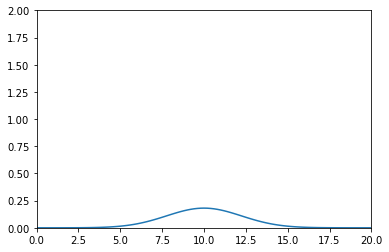

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = plt.plot([], [])

def init():
    ax.set_xlim(0, L)
    ax.set_ylim(0, 2)

    return ln,

def update(frame):
    ln.set_data(x, P[frame])
    return ln,

ani = FuncAnimation(fig, update, frames=np.array(range(nt+1)),
                    init_func=init, blit=True)
ani.save('fig.gif')

In [3]:
from scipy import stats
X_0 = 10
x = np.linspace(X_0 - 5, X_0 + 5, 100)

P_stoc = np.zeros((nt+1,x.size))

for m in range(nt+1):
    mu = X_0*np.exp(-gamma*m*dt)
    var = sigma**2*((1-np.exp(-2*gamma*m*dt))/(2*gamma))/2
    P_stoc[m] = stats.norm.pdf(x, mu, var)

C:\Users\samue\AppData\Local\Temp/ipykernel_34004/1983119683.py:9: RuntimeWarning: invalid value encountered in double_scalars
  var = sigma**2*((1-np.exp(-2*gamma*m*dt))/(2*gamma))/2


MovieWriter ffmpeg unavailable; using Pillow instead.


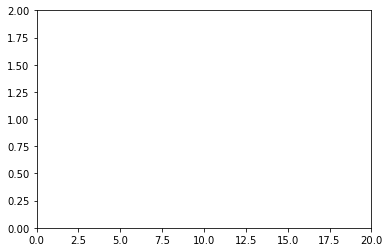

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = plt.plot([], [])

def init():
    ax.set_xlim(0, L)
    ax.set_ylim(0, 2)

    return ln,

def update(frame):
    ln.set_data(x, P_stoc[frame])
    return ln,

ani = FuncAnimation(fig, update, frames=np.array(range(nt+1)),
                    init_func=init, blit=True)
ani.save('fig2.gif')

In [5]:
mu_0 = L/2
sigma_0 = 0.1
x_samples = []
for i in range(10000):
    x = np.zeros(nt+1)
    x[0] = np.random.normal()*sigma_0+mu_0
    for j in range(1,nt+1):
        a = np.random.normal()
        x[j] = x[j-1] - dt*gamma*x[j-1] + sigma*np.sqrt(dt)*a
    x_samples.append(x)
x_samples = np.array(x_samples).T

MovieWriter ffmpeg unavailable; using Pillow instead.


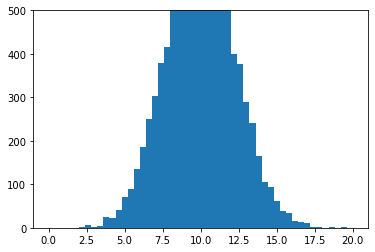

In [6]:
def update_hist(num, data):
    plt.cla()
    plt.hist(data[num],50,(0,L))
    plt.ylim([0,500])

fig, ax = plt.subplots()

hist = plt.hist(x_samples[0])

animation = FuncAnimation(fig, update_hist, nt+1, fargs=(x_samples, ))
animation.save('fig3.gif')